<a name="1common."></a>
## Содержание:
* [0. Описание проекта, описание данных, загрузка и импорт библиотек](#0.)
* [1. Приоритизация гипотез](#1.)
     - [1.1. ICE](#1.1.)
     - [1.2. RICE](#1.2.)
     - [1.3. Сравнительный анализ](#1.3.)
* [2. Анализ A/B-теста](#2.)
     - [2.1. Таблица visitors](#2.1.)
     - [2.2. Таблица orders](#2.2.)
     - [2.3. Кумулятивная выручка в разбивке по группам](#2.3.)
     - [2.4. Кумулятивный средний чек по группам, относительное изменение кум. средних чеков группы B к группе A](#2.4.)
     - [2.5. Кумулятивная конверсия по группам, относительное изменение кум. конверсии группы B к группе A](#2.5.)
     - [2.6. Анализ количества заказов по пользователям](#2.6.)
     - [2.7. Анализ стоимости заказов по пользователям](#2.7.)
     - [2.8. Очистка данных](#2.8.)
     - [2.9. Результаты A/B-теста](#2.9.)
* [3. Итоги](#3.)

# Описание проекта<a name="0."></a>
[<font size="2">(к содержанию)</font>](#1common.)

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

# Описание данных
[<font size="2">(к содержанию)</font>](#1common.)

Данные для первой части<br/>
<b>Файл /datasets/hypothesis.csv:</b>
* <b>Hypothesis</b> — краткое описание гипотезы;
* <b>Reach</b> — охват пользователей по 10-балльной шкале;
* <b>Impact</b> — влияние на пользователей по 10-балльной шкале;
* <b>Confidence</b> — уверенность в гипотезе по 10-балльной шкале;
* <b>Efforts</b> — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части<br/>
<b>Файл /datasets/orders.csv:</b>
* <b>transactionId</b> — идентификатор заказа;
* <b>visitorId</b> — идентификатор пользователя, совершившего заказ;
* <b>date</b> — дата, когда был совершён заказ;
* <b>revenue</b> — выручка заказа;
* <b>group</b> — группа A/B-теста, в которую попал заказ.

<b>Файл /datasets/visitors.csv</b>
* <b>date</b> — дата;
* <b>group</b> — группа A/B-теста;
* <b>visitors</b> — количество пользователей в указанную дату в указанной группе A/B-теста

# Загрузка библиотек
[<font size="2">(к содержанию)</font>](#1common.)

In [1]:
!pip install bokeh

In [2]:
!pip install holoviews

# Импорт библиотек
[<font size="2">(к содержанию)</font>](#1common.)

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
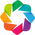

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict

from bokeh.models.widgets import DataTable, TableColumn, RadioButtonGroup, Select
from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.io import output_file, reset_output, output_notebook
from bokeh.models.widgets import Tabs, Panel, Div
from bokeh.models import Span, Range1d, CustomJS, TextInput, HoverTool
from bokeh.layouts import layout, row, column, widgetbox, gridplot
from bokeh.models import SingleIntervalTicker, LinearAxis, Label, Span
output_notebook()

import holoviews as hv
from holoviews import dim, opts
hv.extension('bokeh', 'matplotlib')
hv.output(max_frames=5000)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', -1)

<a name="1."></a><br/>
<font size="5"><b>1. Загрузка и изучение данных</b></font>
<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [4]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Т.к. таблица <b>hypothesis</b> небольшая, посмотрим её обычным способом:

In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<a name="1.1."></a><br/>
<b>1.1. Расчет приоритизации (использование методики ICE)</b>:
<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [7]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='ICE')
hypothesis.index = range(len(hypothesis))
hypothesis_ICE = hypothesis[['Hypothesis', 'ICE']].reset_index()
hypothesis_ICE.columns = ['ICE_number', 'Hypothesis', 'ICE']
hypothesis_ICE['ICE_number'] += 1
hypothesis_ICE

,ICE_number,Hypothesis,ICE
0,1,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00
1,2,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
2,3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,4,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
4,5,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
6,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
7,8,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20


<a name="1.2."></a><br/>
<b>1.2. Расчет приоритизации (использование методики RICE)</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [8]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='RICE')
hypothesis.index = range(len(hypothesis))
hypothesis_RICE = hypothesis[['Hypothesis', 'RICE']].reset_index()
hypothesis_RICE.columns = ['RICE_number', 'Hypothesis', 'RICE']
hypothesis_RICE['RICE_number'] += 1
hypothesis_RICE

,RICE_number,Hypothesis,RICE
0,1,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0
1,2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
2,3,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
4,5,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
6,7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,8,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
8,9,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0


<a name="1.3."></a><br/>
<b>1.3. Сравнительный анализ</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [9]:
df_common = hypothesis_ICE.merge(hypothesis_RICE, on='Hypothesis').sort_values(by='ICE', ascending=False)
df_common = df_common[['Hypothesis', 'ICE_number', 'RICE_number']]
df_common['Descr'] = ['Скидка на ДР', 'Трафик (+2)', 'Подписка', 'Баннеры гл.стр.', 'Реком.товар', 
                            'Доставка', 'Стр-ца отзывов', 'Изм. категорий', 'Цвет фона']
df_common

,Hypothesis,ICE_number,RICE_number,Descr
8,"Запустить акцию, дающую скидку на товар в день рождения",9,5,Скидка на ДР
7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",8,7,Трафик (+2)
6,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,9,Подписка
5,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",6,6,Баннеры гл.стр.
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5,8,Реком.товар
3,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,3,Доставка
2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,Стр-ца отзывов
1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",2,4,Изм. категорий
0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,Цвет фона


In [10]:
%opts Bars [xrotation=90 width=950 height=450 show_legend=False]
%opts Bars [fontsize={'title': 16, 'xticks': 8.5, 'yticks': 10}]
tidy_df = df_common.melt(id_vars=['Descr'], value_vars=['ICE_number', 'RICE_number'])
tidy_df.columns = ['Descr', 'results', 'Результат']
hover_prior = HoverTool(tooltips=[('result', '@{Результат}')])
bars = hv.Bars(tidy_df, ['Descr', 'results'], ['Результат']).opts(ylim=(0,10), tools=[hover_prior], 
                                                                         xlabel='', yticks=10)
bars

:Bars   [Descr,results]   (Результат)

## Итог:
параметр охвата (<b>Reach</b>), использующийся в методе <b>RICE</b> изменил весь результат, полученную по методу <b>ICE</b>:
* без учета охвата на первом месте идет акция со скидкой в ДР, но параметр <b>Reach</b> справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный (по сравнению с другими гипотезами увеличения выручки);
* также произошло и с гипотезой о добавлении 2х каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов;
* без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы);
* выросли в рейтинге (стали более приоритетными) <b>RICE</b> (по сравнению с <b>ICE</b>) гипотеза о добавлении формы подписки на все основные страницы ресурса, о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.

<a name="2."></a><br/>
<font size="5"><b>2. Анализ A/B-теста</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

<a name="2.1."></a><br/>
<b>2.1. Таблица visitors</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные чистые.

<a name="2.2."></a><br/>
<b>2.2. Таблица orders</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Данные в этом датафрейме также чистые.

Формируем группу риска (пользователи с более чем 1 заказом). Оценим сколько у нас таких пользователей:

In [14]:
sizes = orders.groupby(['visitorId', 'group']).size().reset_index()
sizes.columns = ['visitorId', 'group', 'count']
sizes = sizes.query('count > 1').sort_values(by='visitorId')
sizes.head(20)

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
108,406208401,B,2
122,457167155,B,3
138,522292794,B,2
158,611059232,A,3
177,678354126,A,2


Заметил, что есть пользователь, которые относятся как к группе А, так и к группе B (например, id пользователя <b>1230306981</b>).<br/><br/> Поищем еще.

In [15]:
emissions_users = sizes.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').index
print('Пользователи видели обе версии сайта', emissions_users)

Пользователи видели обе версии сайта Int64Index([1230306981, 2038680547, 2378935119, 2458001652, 4256040402], dtype='int64', name='visitorId')


Таких 5 пользователей. Посмотрим данные по ним по датафрейму <b>orders</b>, чтобы понять масштабы бедствия:

In [18]:
emissions_orders = orders.query('visitorId in @emissions_users')
emissions_orders.head(10)

,transactionId,visitorId,date,revenue,group
32,3666913472,2038680547,2019-08-15,1680,B
33,486237576,2378935119,2019-08-15,1650,A
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
117,722060263,2038680547,2019-08-22,760,A
118,4233533907,2378935119,2019-08-22,3390,A
133,3060563671,2458001652,2019-08-22,5190,A
179,1784270968,2378935119,2019-08-17,310,A
187,2048878902,4256040402,2019-08-17,1550,A
227,4267573899,2038680547,2019-08-17,3470,A


Посмотрим, сколько заказов они сделали, на какую сумму и по каким группам:

In [19]:
emissions_orders_grouped = (emissions_orders
                           .groupby(['visitorId', 'group', 'date'])
                           .agg({'transactionId': 'nunique', 'revenue': 'sum'})
                           )
emissions_orders_grouped

transactionId  revenue
visitorId  group date                              
1230306981 A     2019-08-09  3              18440  
           B     2019-08-09  2              12840  
2038680547 A     2019-08-04  2              4070   
                 2019-08-17  1              3470   
                 2019-08-22  1              760    
                 2019-08-25  1              270    
           B     2019-08-04  1              2800   
                 2019-08-15  1              1680   
                 2019-08-29  1              2420   
2378935119 A     2019-08-10  1              58220  
                 2019-08-15  1              1650   
                 2019-08-17  1              310    
                 2019-08-22  1              3390   
           B     2019-08-09  1              30649  
                 2019-08-10  1              2640   
                 2019-08-25  1              21220  
                 2019-08-28  2              24860  
2458001652 A     2019-08-04  1              340    
                 2019-08-06  1              1620   
                 2019-08-07  1              17379  
                 2019-08-11  1              8280   
                 2019-08-22  1              5190   
           B     2019-08-05  1              2420   
                 2019-08-06  2              14030  
                 2019-08-08  1              5227   
                 2019-08-09  1              5227   
                 2019-08-25  1              2385   
4256040402 A     2019-08-01  1              5800   
                 2019-08-12  1              50     
                 2019-08-17  1              1550   
                 2019-08-20  1              17650  
                 2019-08-23  1              16950  
                 2019-08-27  1              1630   
                 2019-08-31  1              5170   
           B     2019-08-08  1              58220  
                 2019-08-16  1              56650  
                 2019-08-18  1              10970  
                 2019-08-31  1              1850

In [20]:
print('Количество заказов данными пользователями', emissions_orders_grouped['revenue'].count())

Количество заказов данными пользователями 38


Они сделали в общей сложности 38 заказа и принесли компании немало выручки. Получается, что данные "испорчены" этими пользователями.<br/>

В связи с этим, создадим копии наших основных датафреймов <b>orders</b> и <b>visitors</b> и в них уберем данные по этим пользователям из датафрейма <b>orders</b> и для корректности из таблицы <b>visitors</b> удалим по одному посетителю в соответствующих группах и в соответствии с датами, полученными выше. В конце выполнения задачи, рассчитаем стат. значимость для обоих наборов данных: с этими "неправильными" пользователями и без них, - чтобы проследить, влияют ли они на конечный результат.<br/><br/>
Чистим датафреймы:
* <b>orders</b>:

In [21]:
orders_filter = orders.query('visitorId not in @emissions_users')

In [22]:
orders_filter.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


* <b>visitors</b>:

Сначала добавим к нашему кастомному датафрейму столбец <b>count</b>, где проставим значение <b>-1</b>, и возьмем только столбцы <b>group, date</b> и <b>count</b>:

In [23]:
emissions_orders_grouped = emissions_orders_grouped.reset_index()
emissions_orders_grouped['count'] = -1
emissions_orders_grouped = emissions_orders_grouped[['group', 'date', 'count']]
emissions_orders_grouped.head()

,group,date,count
0,A,2019-08-09,-1
1,B,2019-08-09,-1
2,A,2019-08-04,-1
3,A,2019-08-17,-1
4,A,2019-08-22,-1


Объединим наш начальный датайфрейм <b>visitors</b> с полученным выше:

In [24]:
visitors_filter = visitors.merge(emissions_orders_grouped, on=['date', 'group'], how='left').fillna(0)
visitors_filter.head()

,date,group,visitors,count
0,2019-08-01,A,719,-1.0
1,2019-08-02,A,619,0.0
2,2019-08-03,A,507,0.0
3,2019-08-04,A,717,-1.0
4,2019-08-04,A,717,-1.0


Теперь добавим новый столбец, где построчно просуммируем значения столбцов <b>visitors</b> и <b>count</b>:

In [25]:
visitors_filter['visitors_'] = visitors_filter['visitors'] + visitors_filter['count']
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Отбросим старый столбец <b>visitors</b> и вспомогательный столбец <b>count</b>, переименуем новый столбец <b>visitors_</b> в <b>visitors</b>:

In [26]:
visitors_filter = visitors_filter.drop(['visitors', 'count'], axis=1)
visitors_filter.columns = ['date', 'group', 'visitors']
visitors_filter['visitors'] = visitors_filter['visitors'].astype(int)
visitors_filter.head()

,date,group,visitors
0,2019-08-01,A,718
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,716
4,2019-08-04,A,716


Готово. Датафрейм <b>visitors</b> тоже почищен от заранее некорректных данных.

<a name="2.3."></a><br/>
<b>2.3. Кумулятивная выручка в разбивке по группам</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [27]:
cum_rev = orders_filter.groupby(['group', 'date'])['revenue'].sum().groupby(level=[0]).cumsum().to_frame()
cum_rev = cum_rev.reset_index()
cum_rev['date'] = cum_rev['date'].apply(lambda x: x.split('-')[2] + '-' + x.split('-')[1])
cum_rev.head()

,group,date,revenue
0,A,01-08,142779
1,A,02-08,236601
2,A,03-08,349074
3,A,04-08,415489
4,A,05-08,539707


Посмотрим на график кумулятивной выручки по обеим группам:

Text(0.5, 1.0, 'График кумулятивной выручки по группам')

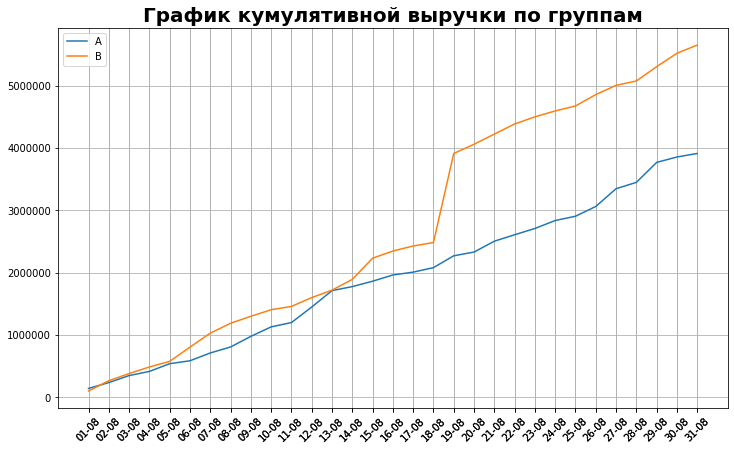

In [28]:
# Сoздадим таблицу с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulRevenueA = cum_rev[cum_rev['group'] == 'A'][['date', 'revenue']]
# Сoздадим таблицу с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulRevenueB = cum_rev[cum_rev['group'] == 'B'][['date', 'revenue']]

plt.figure(figsize=(12, 7)) 
# Строим графики для cumulRevenueA и cumulRevenueB
plt.plot(cumulRevenueA['date'], cumulRevenueA['revenue'], label='A')
plt.plot(cumulRevenueB['date'], cumulRevenueB['revenue'], label='B')
plt.xticks(cum_rev['date'], rotation = 45)
plt.legend()
plt.grid(True)
plt.title('График кумулятивной выручки по группам', fontsize=20, fontweight='bold')

В течение всего периода график кумулятивной выручки группы B лежит выше, чем график кумулятивной выручки группы A.<br/>
Получается, что пользователи, посещающие наш сайт в версии "B", приносят нам больше денег.

<a name="2.4."></a><br/>
<b>2.4. Кумулятивный средний чек по группам, относительное изменение кум. средних чеков группы B к группе A</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Подготовим датафрейм для построения графика среднего чека по группам:

In [29]:
#достаем уникальные значения дат и групп
datesGroups = orders_filter[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

#выводим кумулятивные показатели из orders
ordersAggregated = datesGroups.apply(lambda x: orders_filter[np.logical_and(x['date'] >= orders_filter['date'],\
                                                                            x['group']==orders_filter['group'])]
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1)
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
#выводим кумулятивные показатели из visitors
visitorsAggregated = datesGroups.apply(lambda x: visitors_filter[np.logical_and(x['date'] >= visitors_filter['date'],\
                                                                                x['group']==visitors_filter['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1)
#сводим все накопительные данные в одну таблицу
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cummulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,43,37,236601,1337
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,67,61,349074,1844


In [30]:
cum_mean_check = (orders_filter
                      .groupby(['group', 'date'])['revenue']
                      .mean()
                      .groupby(level=[0])
                      .cumsum()
                      .round(2)
                      .to_frame()
                      .reset_index()
                 )

In [31]:
cummulativeData['date'] = cummulativeData['date'].apply(lambda x: x.split('-')[2] + '-' + x.split('-')[1])
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,01-08,A,23,19,142779,718
1,01-08,B,21,20,101217,713
2,02-08,A,43,37,236601,1337
3,02-08,B,45,43,266748,1294
4,03-08,A,67,61,349074,1844


График среднего чека по группам:

Text(0.5, 1.0, 'Кумулятивный средний чек по группам')

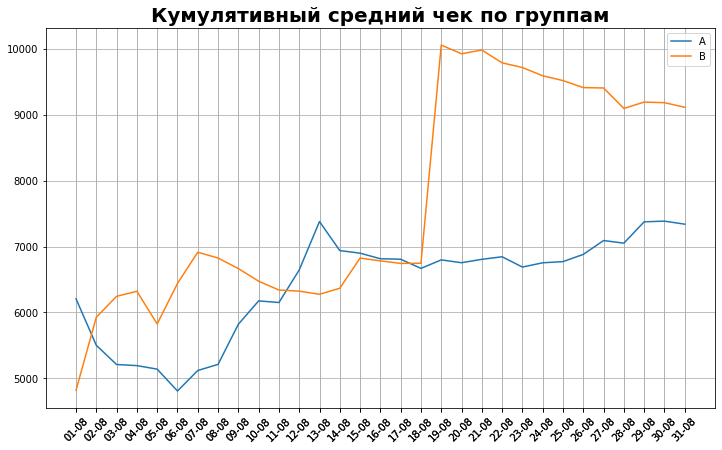

In [32]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.figure(figsize=(12, 7)) 

plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')

plt.xticks(cummulativeData['date'], rotation = 45)
plt.legend()
plt.grid(True)
plt.title('Кумулятивный средний чек по группам', fontsize=20, fontweight='bold')

Подготовим датафрейм для отрисовки графика относительного изменения кумулятивных средних чеков группы В к группе А:

In [33]:
mean_check_A = cum_mean_check.query('group == "A"')['revenue'].tolist()
mean_check_B = cum_mean_check.query('group == "B"')['revenue'].tolist()

mean_check_rel = [y/x for x,y in zip(mean_check_A, mean_check_B)]

cum_mean_check_rel = pd.DataFrame({'date': cum_mean_check['date'].unique(),
                                   'mean_check_rel': mean_check_rel})

In [34]:
cum_mean_check_rel.head()

,date,mean_check_rel
0,2019-08-01,0.776422
1,2019-08-02,1.075063
2,2019-08-03,1.209956
3,2019-08-04,1.230697
4,2019-08-05,1.151839


Готовим второй график:

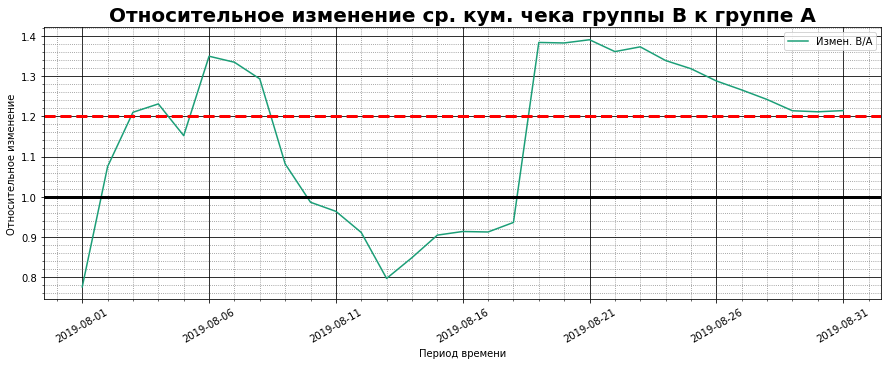

In [35]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15, 5))
x = ('date')
y1 = ['mean_check_rel']
cum_mean_check_rel.plot(x, y1, ax = ax, colormap='Dark2', rot = 30)

#  Устанавливаем интервал основных и
#  вспомогательных делений:
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))


#  Добавляем линии основной сетки:
ax.grid(which='major',
        color = 'k')

#  Включаем видимость вспомогательных делений:
ax.minorticks_on()
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
ax.grid(which='minor',
        color = 'gray',
        linestyle = ':')
ax.legend(['Измен. В/А'])
plt.axhline(y=1, linewidth=3, color='black')
plt.axhline(y=1.2, linewidth=3, color='red', linestyle='--')
plt.title('Относительное изменение ср. кум. чека группы B к группе A', fontsize=20, fontweight='bold')
plt.xlabel('Период времени')
plt.ylabel('Относительное изменение');

<font size="4"><b>Вывод:</b></font><br/>

На большей части графика средний чек по группе B выше, чем по группе A. До 18 августа они были практически наравне, но потом произошел резкий скачок у группы B, именно засчет этого скачка средний чек лежит выше, потому что в дальнейшем рост графиков идет одинаковыми темпами <br/>
Однако, стоит добавить, что статистически значимой разницы между средними чеками этих групп не наблюдается.

<a name="2.5."></a><br/>
<b>2.5. Кумулятивная конверсия по группам, относительное изменение кум. конверсии группы B к группе A</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Подготовим датафрейм для построения графика конверсии по группам:

In [36]:
mergedCummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])
mergedCummulativeData.head()

,date,groupA,ordersA,buyersA,revenueA,visitorsA,groupB,ordersB,buyersB,revenueB,visitorsB
0,01-08,A,23,19,142779,718,B,21,20,101217,713
1,02-08,A,43,37,236601,1337,B,45,43,266748,1294
2,03-08,A,67,61,349074,1844,B,61,59,380996,1803
3,04-08,A,80,74,415489,3276,B,77,74,486767,2572
4,05-08,A,105,97,539707,4032,B,99,96,576775,3278


In [37]:
orders_conversion = orders_filter.groupby(['date', 'group'])['transactionId'].nunique().to_frame().reset_index()

df_conversion = orders_conversion.merge(visitors, on=['date', 'group'])
df_conversion['conversion'] = (df_conversion['transactionId'] / df_conversion['visitors']).round(4)
df_conversion = df_conversion[['date', 'group', 'conversion']]

df_conversion = (df_conversion
                          .groupby(['group', 'date'])['conversion']
                          .mean()
                          .groupby(level=[0])
                          .cumsum()
                          .round(2)
                          .to_frame()
                 )
df_conversion = df_conversion.reset_index()
df_conversion['date'] = df_conversion['date'].apply(lambda x: x.split('-')[2] + '-' + x.split('-')[1])

In [38]:
df_conversion.head()

,group,date,conversion
0,A,01-08,0.03
1,A,02-08,0.06
2,A,03-08,0.11
3,A,04-08,0.13
4,A,05-08,0.16


Создаем график:

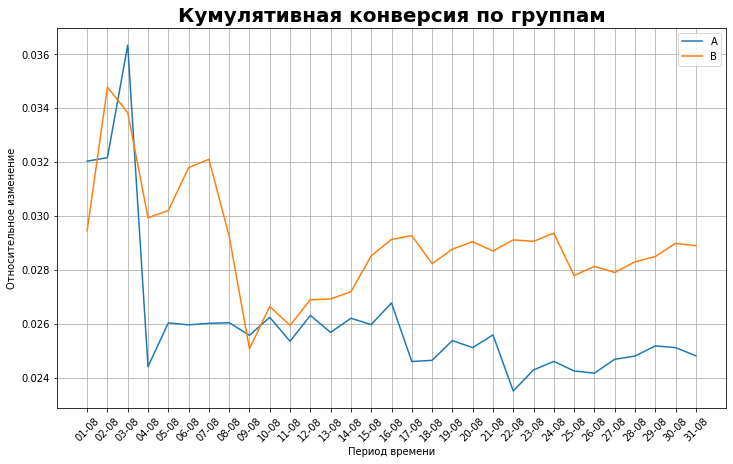

In [39]:
# построим график кумулятивной конверсия по группам
# Сoздадим таблицу с кумулятивным конверсией заказов по дням в группе А
mergedCummulativeData['conversionA'] =  mergedCummulativeData['ordersA'] / mergedCummulativeData['visitorsA'] 
# Сoздадим таблицу с кумулятивным конверсией заказов по дням в группе B
mergedCummulativeData['conversionB'] =  mergedCummulativeData['ordersB'] / mergedCummulativeData['visitorsB']

plt.figure(figsize=(12, 7)) 
# Строим графики
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionA'], label='A')
plt.plot(mergedCummulativeData['date'], mergedCummulativeData['conversionB'], label='B')
plt.xticks(mergedCummulativeData['date'], rotation = 45)
plt.legend()
plt.grid(True)
plt.title('Кумулятивная конверсия по группам', fontsize=20, fontweight='bold')
plt.xlabel('Период времени')
plt.ylabel('Относительное изменение');

Группа B показывает большую конверсию чем группа A и это не плохо

Датафрейм для построения графика относительного изменения кумулятивной конверсии группы В к группе А:

In [40]:
cum_conv_rel = df_conversion.reset_index()

mean_conv_A = cum_conv_rel.query('group == "A"')['conversion'].tolist()
mean_conv_B = cum_conv_rel.query('group == "B"')['conversion'].tolist()

mean_conv_rel = [y/x for x,y in zip(mean_conv_A, mean_conv_B)]

cum_mean_conv_rel = pd.DataFrame({'date': cum_conv_rel['date'].unique(),
                                  'conversion': mean_conv_rel})

Готовим второй график:

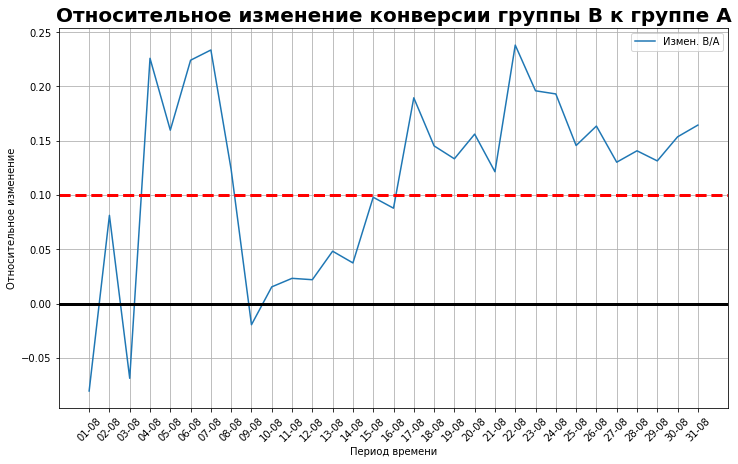

In [41]:
plt.figure(figsize=(12, 7)) 
plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['conversionB']/mergedCummulativeData['conversionA'])-1))

plt.axhline(y=0, linewidth=3, color='black')
plt.axhline(y=0.1, linewidth=3, color='red', linestyle='--')
plt.xticks(mergedCummulativeData['date'], rotation = 45)
plt.grid(True)
plt.legend(['Измен. В/А'])
plt.title('Относительное изменение конверсии группы B к группе A', fontsize=20, fontweight='bold')
plt.xlabel('Период времени')
plt.ylabel('Относительное изменение');

<font size="4"><b>Вывод:</b></font><br/>

Конверсия в группе B стабильно лучше конверсии в группе A на примерно 10% по просшествии 1 недели после начала

<a name="2.6."></a><br/>
<b>2.6. Анализ количества заказов по пользователям</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [42]:
orders_by_user = orders_filter.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_user['observation'] = range(1, len(orders_by_user)+1)

In [43]:
orders_by_user.head()

,visitorId,transactionId,observation
0,5114589,1,1
1,6958315,1,2
2,8300375,2,3
3,11685486,1,4
4,39475350,1,5


Text(0.5, 1.0, 'Кол-во заказов по пользователям')

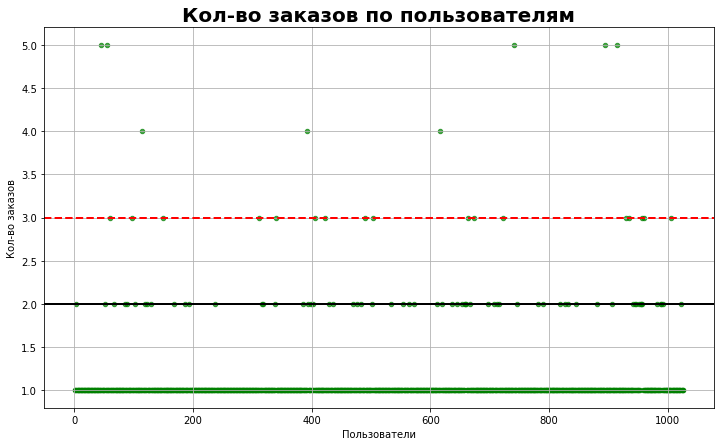

In [44]:
orders_by_user.plot(x='observation', y='transactionId', kind='scatter', color='green', alpha =.7, figsize=(12, 7))
perc_95 = np.percentile(orders_by_user['transactionId'], 95)
perc_99 = np.percentile(orders_by_user['transactionId'], 99)

plt.axhline(y=perc_95, linewidth=2, color='black')
plt.axhline(y=perc_99, linewidth=2, color='red', linestyle='--')

plt.title('Относительное изменение конверсии группы B к группе A', fontsize=20, fontweight='bold')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')

plt.grid(True)
plt.title('Кол-во заказов по пользователям', fontsize=20, fontweight='bold')

Большая часть клиентов сделали по 1 заказу.<br/>
<b>95ый перцентиль</b> равен 2 заказам, <b>99ый</b> - 3.<br/>
Есть даже клиенты, которые сделали по 5 заказов в течение одного месяца.

В дальнейшем отфильтруем пользователей, взяв только тех, кто совершил до 3 заказов включительно:

<a name="2.7."></a><br/>
<b>2.7. Анализ стоимости заказов по пользователям</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [45]:
revenue_by_user = orders_filter.sample(frac=1)
revenue_by_user['observation'] = range(1, len(revenue_by_user)+1)

In [46]:
revenue_by_user.head()

,transactionId,visitorId,date,revenue,group,observation
113,2663968367,821846484,2019-08-01,1630,A,1
566,3600573749,3928949490,2019-08-26,5530,A,2
810,290471249,2041539477,2019-08-21,8099,A,3
1142,3815014015,2606908679,2019-08-13,52900,B,4
1069,2375657872,3476822370,2019-08-12,2061,A,5


In [47]:
ds = hv.Dataset(revenue_by_user)
perc_95 = np.percentile(revenue_by_user['revenue'], 95)
perc_99 = np.percentile(revenue_by_user['revenue'], 99)

hover = HoverTool(tooltips=[('Выручка от клиента', '@{revenue}')])

points = (ds.to(hv.Points, ['observation', 'revenue'])
         .overlay()
         .opts(opts.Points(width=700, height=450, xlim=(0, len(revenue_by_user)), ylim=(0, 210000), 
                          yrotation=0, color='#6f41ab', size=5,
                          fontsize={'title': 16, 'xticks': 10, 'yticks': 10}, tools=[hover],
                          line_color='black', show_legend=True))
          .opts(xlabel='', ylabel='', yticks=15, yformatter='%d', show_legend=True)
          .relabel('График стоимостей заказов')
         )

line_95 = hv.HLine(perc_95)
line_99 = hv.HLine(perc_99)

plot = (points * line_95 * line_99).opts(width=700, height=450)

plot.opts(shared_axes=False)

:Overlay
   .NdOverlay.График_стоимостей_заказов :NdOverlay   [transactionId,visitorId,date,group]
      :Points   [observation,revenue]
   .HLine.I                             :HLine   [x,y]
   .HLine.II                            :HLine   [x,y]

Сумма по большей части заказов не превышает 28000 рублей. Есть выбросы, но это что-то очень интересное. <br/>
<b>95ый процентиль</b> равен приблизительно 28000 рублей, <b>99ый</b> - 58000 руб.<br/><br/>

В дальнейшем отфильтруем пользователей, взяв только тех, кто совершил хотя бы один заказ на сумму более 58000руб.

<a name="2.8."></a><br/>
<b>2.8. Очистка данных</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [48]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']
print('Кол-во покупателей в группе A: {}'.format(len(ordersByUsersA)))
print('Кол-во покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(ordersByUsersB)))
print('Кол-во покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))


#составим списки кол-ва заказов sampleA и sampleB со всеми пользователями (в том числе и не купившими) по группам 
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')

sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По неочищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')

Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916

Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.008396177528376304
По неочищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Итак, нам нужно удалить из датафрейма пользователей, которые:
* совершили более 3 заказов;
* имеют хотя бы 1 покупку на сумму более 28000руб.

In [49]:
limit_orders = 3
limit_revenue = 28000

Создадим список пользователей с аномальным поведением:

In [50]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['visitorId'], 
                                ordersByUsersB[ordersByUsersB['orders'] > limit_orders]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
#abnormalUsers.head()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 63


In [51]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'
      .format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.148
P-value: 0.008971444295776253
По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [52]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
                                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B',
                                                   np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.017
P-value: 0.48826464606271097
По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


<a name="2.9."></a><br/>
<b>2.9. Результаты A/B-теста</b>:<br/>
[<font size="2">(к содержанию)</font>](#1common.)

<b>
-по конверсии между группами A и B (как по сырым данным, так и по очищенным) есть статистически значимые различия;<br/>
-по среднему чеку между группами A и B нет статистически значимых различий.</b>

<a name="3."></a><br/>
<font size="5"><b>3. Итоги</b>:<br/></font>
[<font size="2">(к содержанию)</font>](#1common.)

Данный тест можно остановить и считать успешно проведенным. Конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. При этом средний чек между группами не отличается.